# Data Visualization on Honey Production dataset using seaborn and matplotlib 


# Domain: Food and agriculture

# Context:

In 2006, a global concern was raised over the rapid decline in the honeybee population, an integral component
to American honey agriculture. Large numbers of hives were lost to “Colony-Collapse-Disorder”, a
phenomenon of disappearing “worker-bees” causing the remaining “hive-colony” to collapse. Speculation
around the cause of this disorder points to hive-diseases and pesticides harming the pollinators, though no
overall consensus has been reached. Twelve years later, some industries are observing recovery but the
American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it
consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey
consumed every year originating from imports. This dataset provides insight into honey production supply and
demand in America by state from 1998 to 2012.

# Objective:

The Goal is to use Python visualization libraries such as seaborn and matplotlib to investigate the data and get
some useful conclusions.

Slno. Attribute : Description
1. numcol = Number of honey producing colonies.
2. yield percol = Honey yield per colony. (Unit is pounds)
3. total prod = Total production (numcol x yieldpercol). (Unit is pounds)
4. price per lb = Refers to average price per pound based on expanded sales. Unit is dollars.
5. prodvalue = Value of production (total prod x priceperlb). Unit is dollars.
6. Stocks = Refers to stocks held by producers. Unit is pounds
7. Year = Calendar year.
8. State = Different states' names.

1. Import required libraries and read the dataset.?

In [1]:
import numpy as np                     # For Mathematical calculations
import pandas as pd                    # For Data manipulation and analysis
import matplotlib.pyplot as plt        # For Visualization
import seaborn as sns                  # For Statistical plotting

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('honeyproduction.csv') # Reading the dataset
data

state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0      AL   16000.0           71   1136000.0    159000.0        0.72   
1      AZ   55000.0           60   3300000.0   1485000.0        0.64   
2      AR   53000.0           65   3445000.0   1688000.0        0.59   
3      CA  450000.0           83  37350000.0  12326000.0        0.62   
4      CO   27000.0           72   1944000.0   1594000.0        0.70   
..    ...       ...          ...         ...         ...         ...   
621    VA    4000.0           41    164000.0     23000.0        3.77   
622    WA   62000.0           41   2542000.0   1017000.0        2.38   
623    WV    6000.0           48    288000.0     95000.0        2.91   
624    WI   60000.0           69   4140000.0   1863000.0        2.05   
625    WY   50000.0           51   2550000.0    459000.0        1.87   

      prodvalue  year  
0      818000.0  1998  
1     2112000.0  1998  
2     2033000.0  1998  
3    23157000.0  1998  
4     1361000.0  1998  
..          ...   ...  
621    618000.0  2012  
622   6050000.0  2012  
623    838000.0  2012  
624   8487000.0  2012  
625   4769000.0  2012  

[626 rows x 8 columns]

2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.?

In [7]:
#Checking samples
data.sample(5)

state    numcol  yieldpercol  totalprod     stocks  priceperlb  prodvalue  \
68     NM   15000.0           52   780000.0   476000.0        0.77   601000.0   
187    LA   35000.0          124  4340000.0   347000.0        1.16  5034000.0   
8      ID  120000.0           50  6000000.0  2220000.0        0.65  3900000.0   
59     MD    6000.0           46   276000.0    50000.0        1.64   453000.0   
331    OR   39000.0           42  1638000.0   557000.0        1.08  1769000.0   

     year  
68   1999  
187  2002  
8    1998  
59   1999  
331  2005

In [8]:
#Checking information about data
data.info()
#There are 626 entries and 8 columns 
#no null values present in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [9]:
#Checking types of data
data.dtypes
#All columns are in numeric except State

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

In [28]:
data.shape
# There are 626 columns and 8 rows

(626, 8)

# 3. Display the percentage distribution of the data in each year using the pie chart.?

In [11]:
#Checking value_counts for year befor ploting a pie chat 
data.year.value_counts()

2001    44
2002    44
2003    44
1998    43
1999    43
2000    43
2004    41
2005    41
2006    41
2007    41
2008    41
2009    40
2010    40
2011    40
2012    40
Name: year, dtype: int64

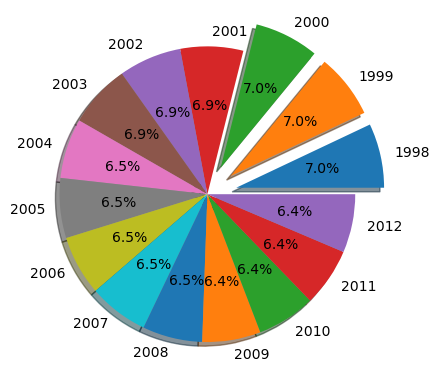

In [7]:
#ploting a pie chat for year
explode=[0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
plt.pie(data.year.value_counts(), autopct = '%.1f%%', labels = ['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',],shadow=True, explode=explode)
plt.show()

# observation on pie plot

In [ ]:
# From the pie plot we can say that alomost all honey was porduced at the range of 6% to 7% each year
# From 1999 to 2000 year was the highest honey production that is 7%

# 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.?

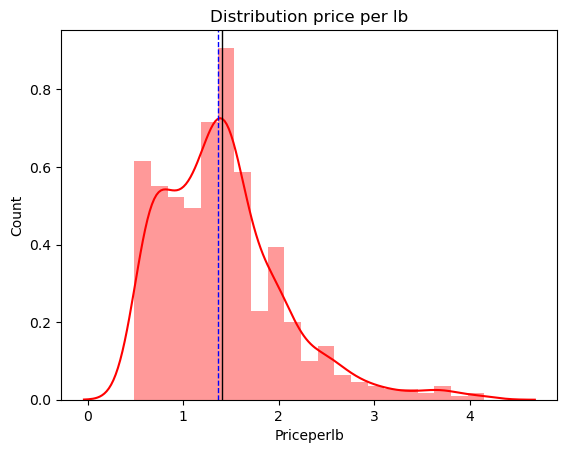

In [31]:
sns.distplot(data, x=data['priceperlb'],color = 'red')
plt.title('Distribution price per lb')
plt.xlabel('Priceperlb')
plt.ylabel('Count')
plt.axvline(data['priceperlb'].mean(), color='black', linewidth=1)
plt.axvline(data['priceperlb'].median(), color='b', linestyle='dashed', linewidth=1)



In [37]:
#Calculating the mean
data['priceperlb'].mean()

1.4095686900958466

In [38]:
#calculating the median
data['priceperlb'].median()

1.36

# observation of distribution

In [ ]:
# Black line is mean and blue dotted line is median
# From the above plot we can say that there is positive skewness the tail is towards the right
# Outliers are found to right
# the mean is greater than the median


# 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and
write your findings.?

Text(0.5, 1.0, 'scatterplot of numcol and prodvalue')

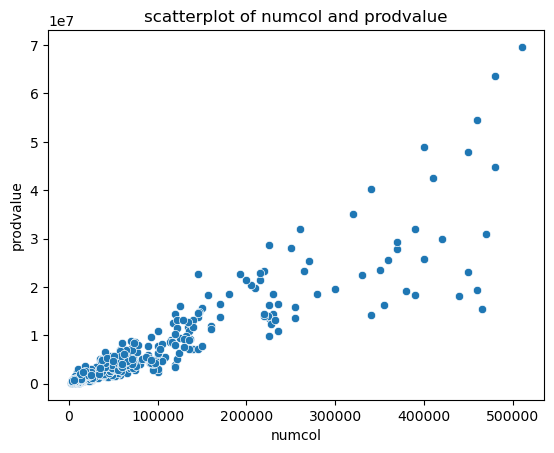

In [46]:
sns.scatterplot(data=data, x="numcol", y="prodvalue")
plt.title('scatterplot of numcol and prodvalue')

# Observation of scatter plot

In [ ]:
# Different between numcol and prodvalue has a Linear relationship
# Positive correlation
# As numcol increase prodvalue also increase
# As number of honey production increases the value of production also increases 

In [3]:
#Scatter plot useing plotly 
import plotly.express as px
fig = px.scatter(data,x='numcol', y='prodvalue', title='scatterplot of numcol and prodvalue')
fig.show()

# 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.


Text(0.5, 1.0, 'Boxplot for year and prodvalue')

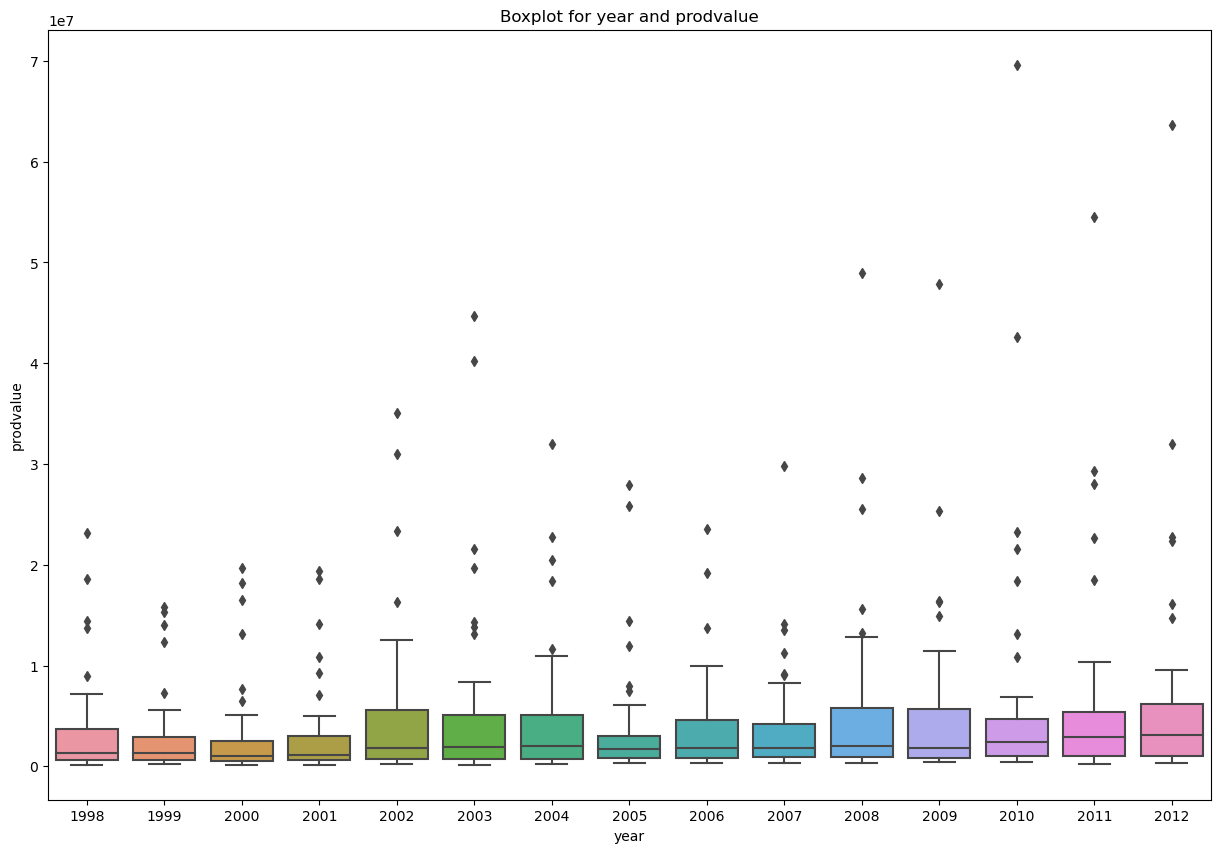

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(data,x='year', y='prodvalue')
plt.title('Boxplot for year and prodvalue')

In [4]:
#box plot useing plotly
fig = px.box(data, x='year', y='prodvalue', title='Boxplot for year and prodvalue')
fig = fig.update_layout(showlegend=True)
fig.show()

# Observation of boxplot

In [ ]:
# In each year outliers found
# In the year 2008 outliers started to increase till 2012
# year 2010 has the most outliers and 1999 has low ouliers

# 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year') ?


Text(0.5, 1.0, 'Pair Plot')

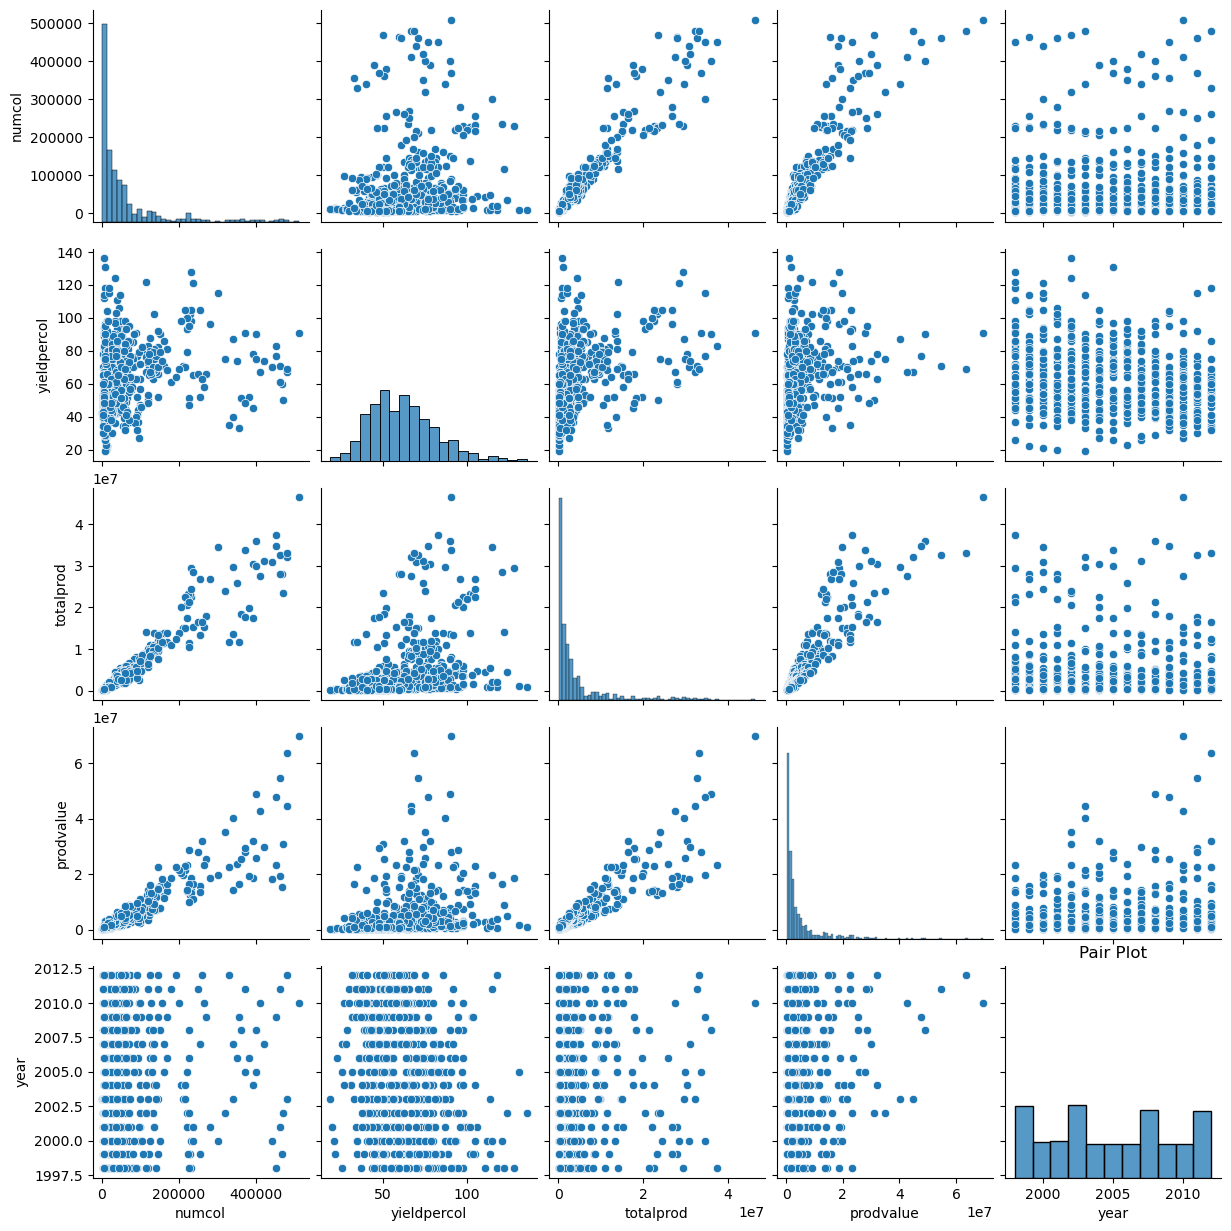

In [64]:
sns.pairplot(data[['numcol', 'yieldpercol', 'totalprod', 'prodvalue','year']])
plt.title('Pair Plot')

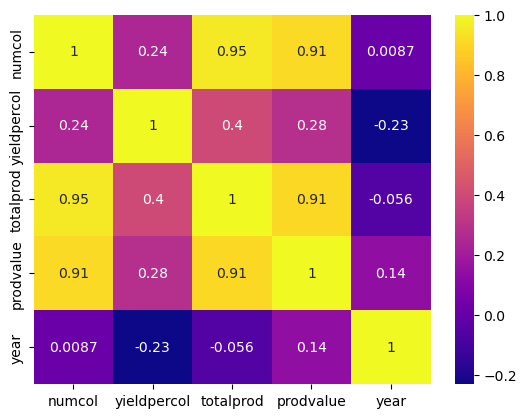

In [22]:
sns.heatmap(data[['numcol', 'yieldpercol', 'totalprod', 'prodvalue','year']].corr(), annot=True, cmap='plasma')
plt.show()

# observation on pair plot

In [ ]:
# All the columns 'numcol', 'yieldpercol', 'totalprod', 'prodvalue','year' has a positive correlation
# There is no correlation for and year
# There is linear relationship 
# Linear Relationship are positive relation as x increases y als increases
# As number of honey production increases the value of production and total production also increases
# numcol and totalprod has the highest correlation




# 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')?


Text(0.5, 1.0, 'PairPlot')

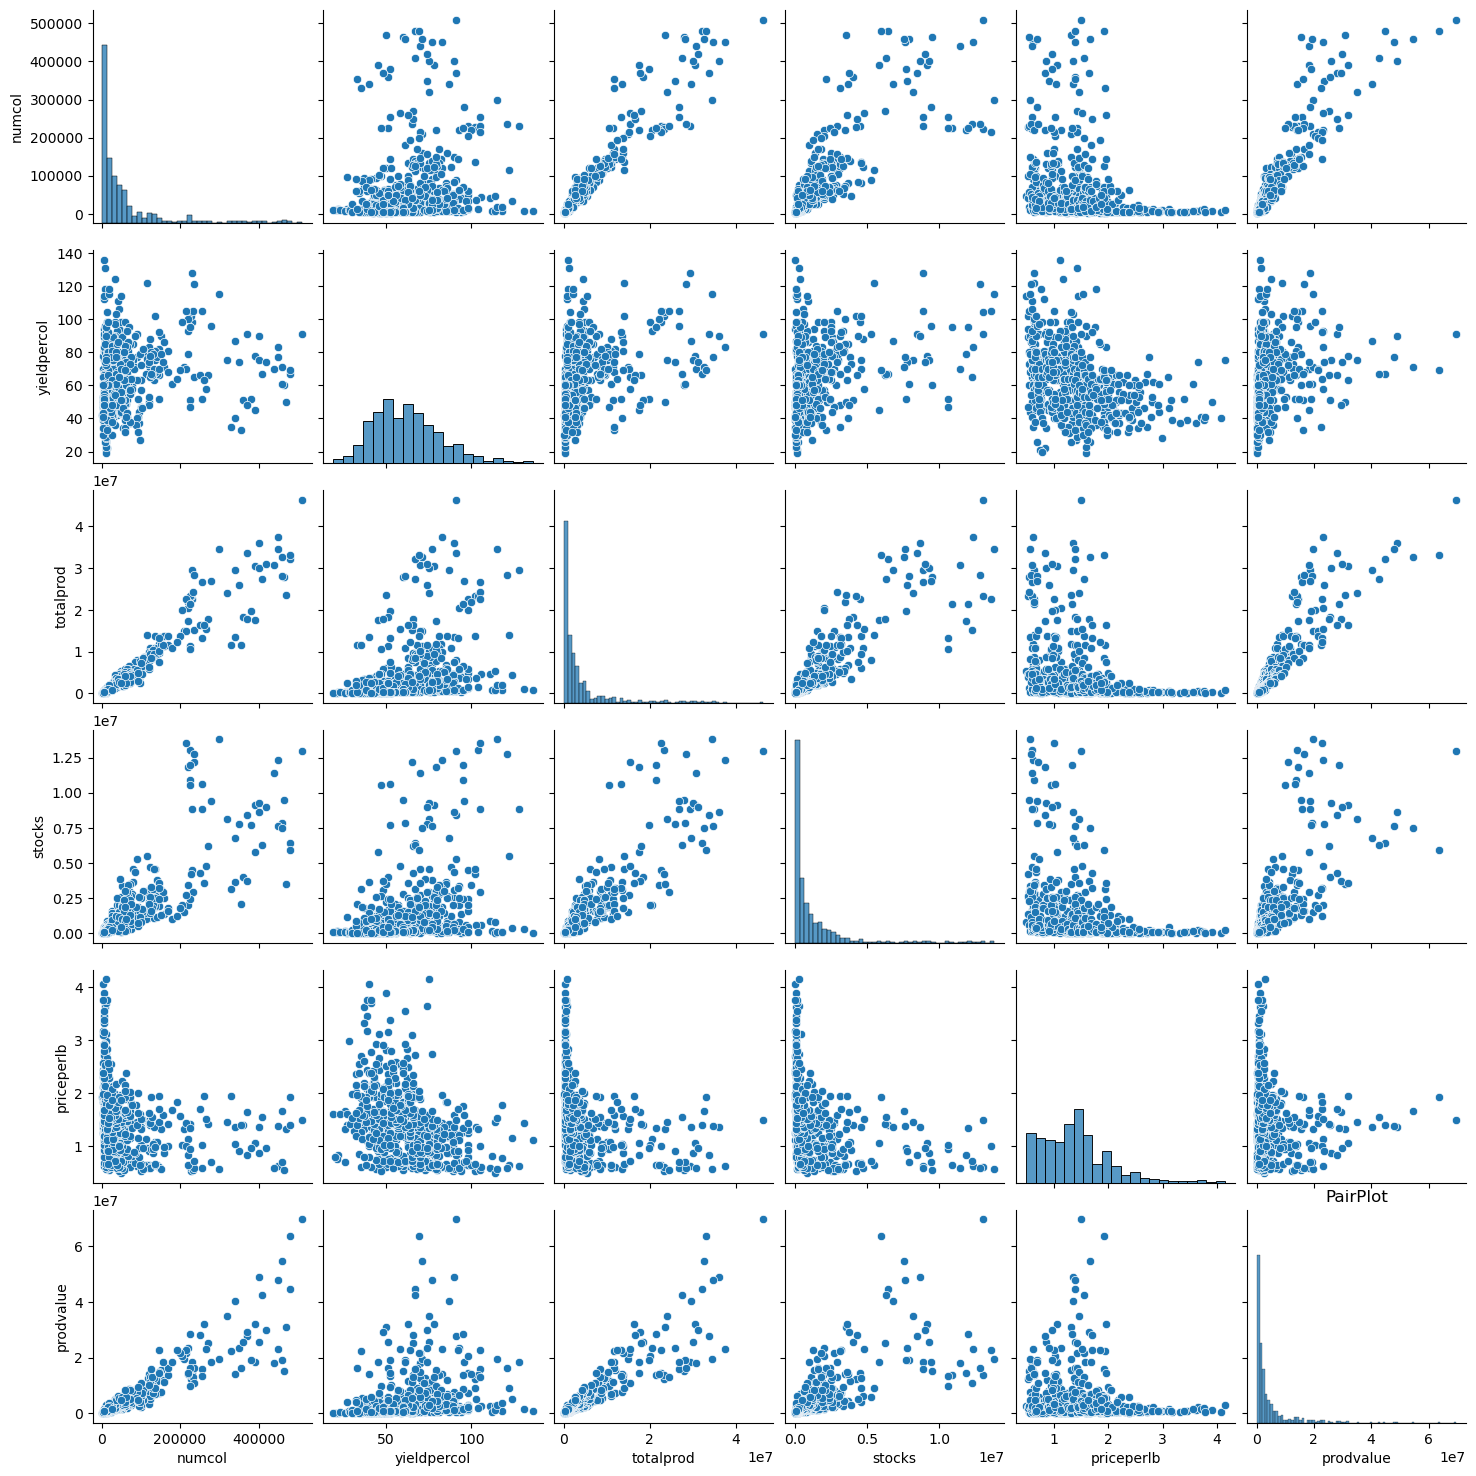

In [65]:
sns.pairplot(data[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']])
plt.title('PairPlot')

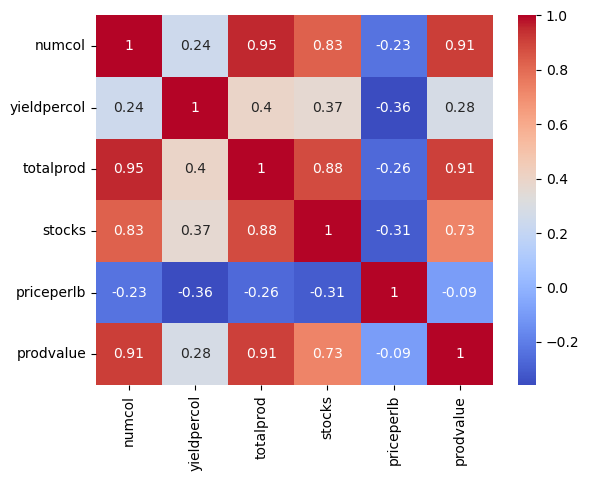

In [27]:
sns.heatmap(data[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']].corr(), annot=True, cmap='coolwarm')
plt.show()

# observation on correlation

In [ ]:
# Priceperlb has a negative correlation with 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'prodvalue'
# numcol', 'yieldpercol', 'totalprod', 'stocks', 'prodvalue' has a positive correlation 
# Negative correlation are as x decreases y also decreases
# Positive correlation are as x increases y als increases
# numcol and totalprod has the highest correlation
# priceperlb and yieldpercol has the lowest correlation -0.36